# Matplotlib

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Simple line chart**

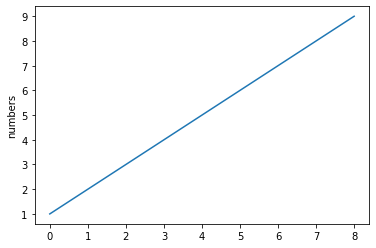

In [131]:
x = np.arange(1, 10, 1)
plt.plot(x)
plt.ylabel('numbers')
plt.show()

**Function graph**

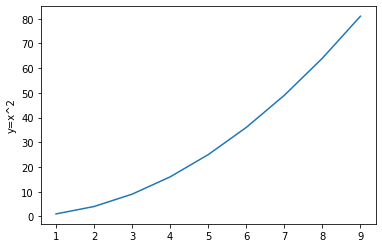

In [132]:
def y(x):
    return x*x

ys = np.array([y(i) for i in x])
plt.plot(x, ys)
plt.ylabel("y=x^2")
plt.show()

**Multiple Function Graphs**

Multiple functions in one chart:

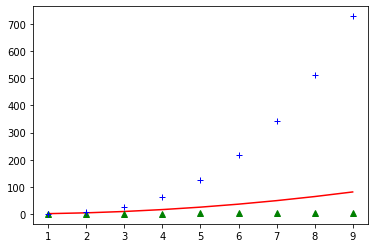

In [133]:
def y_log(x):
    return np.log(x)

def y_third(x):
    return x**3

ys_log = [y_log(i) for i in x]
ys_third = [y_third(i) for i in x]

plt.plot(x, ys, 'r-', x, ys_log, 'g^', x, ys_third, 'b+')
plt.show()

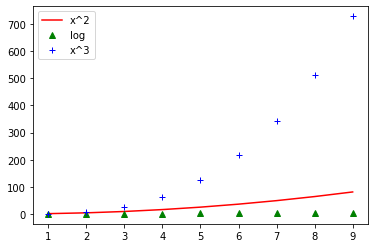

In [135]:
plt.plot(x, ys, 'r-', label='x^2')
plt.plot(x, ys_log, 'g^', label='log')
plt.plot(x, ys_third, 'b+', label='x^3')
plt.legend()
plt.show()

Multiple functions in multiple charts:

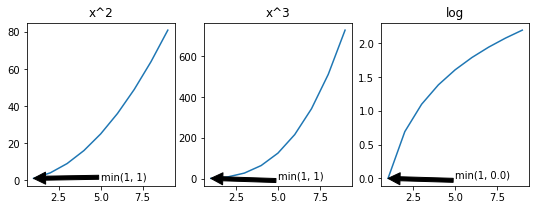

In [124]:
plt.figure(figsize=(9,3))
data = ['ys', 'ys_third', 'ys_log']
graph_names = ['x^2', 'x^3', 'log']
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.plot(x, eval(data[i-1]))
    local_min = (x[0], eval(data[i-1])[0])
    plt.title(graph_names[i-1])
    plt.annotate('min{}'.format(local_min), xy=local_min, xytext=(5,0), arrowprops=dict(facecolor='black'))
plt.show()

**Histogram**

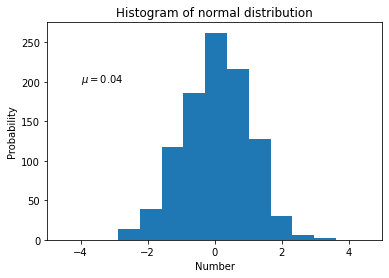

In [136]:
x = np.random.randn(1000)
plt.hist(x)
plt.xlim(-5, 5)
plt.text(-4, 200, '$\mu={:.2f}$'.format(x.mean()))
plt.ylabel('Probability')
plt.xlabel('Number')
plt.title("Histogram of normal distribution")
plt.show()

**Scatter plots**

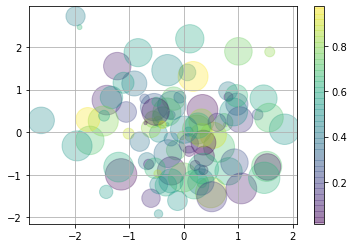

In [139]:
rng = np.random.RandomState(42)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();
plt.grid(True)
plt.show()

## Examples on datasets

**Lets use the iris dataset from sklearn package:**

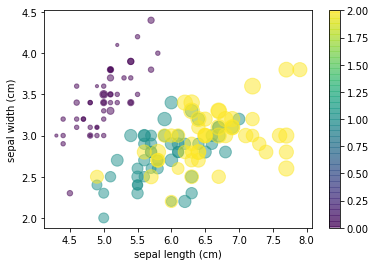

In [156]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris['data'].T

plt.scatter(features[0], features[1], alpha=0.5, s=100*features[3], c=iris['target'], cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar()
plt.show()

**We are going to use the digits dataset also from sklearn package:**  
When using images it is vital to use subplots in order to show the images in a good manner.

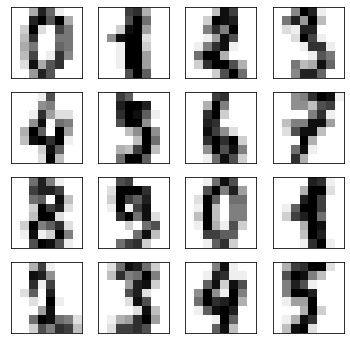

In [254]:
from sklearn.datasets import load_digits
digits_classes = 10
digits = load_digits(n_class=digits_classes)

nrows, ncols = 4, 4
fig, ax = plt.subplots(nrows, ncols, figsize=(6,6))
for image, axi in zip(digits.images, ax.flatten()):
    axi.imshow(image, 'binary')
    axi.set(xticks=[], yticks=[]) # no ticks for images

**We will use the digits dataset again**  
When clustering data it will be usefull to see the clusters in different colors and in a scatter graph:

We will 2 types of dimension reduction algorithms, `isomap` and `PCA` (Principle Component Analysis), we will not go into those algorithms now, all we need to know for now is that we will get from those algorithms the values for x axis and y axis.

In [222]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso_projection = iso.fit_transform(digits.data)

In [223]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_projection = pca.fit_transform(digits.data)

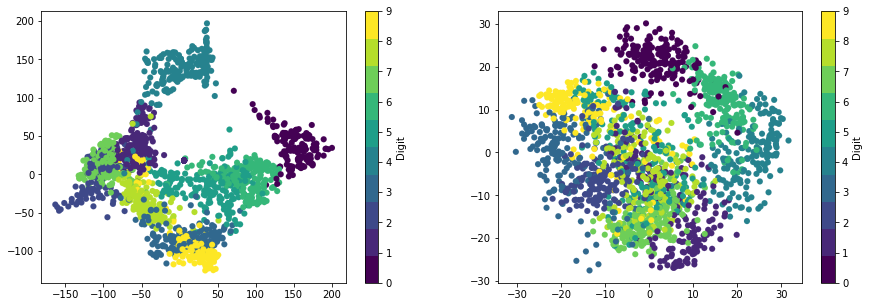

In [253]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(iso_projection[:, 0], iso_projection[:, 1], lw=0.1, 
            c=digits.target, cmap=plt.cm.get_cmap('viridis', digits_classes))
plt.colorbar(ticks=range(digits_classes), label='Digit')

plt.subplot(122)
plt.scatter(pca_projection[:, 0], pca_projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('viridis', digits_classes))
plt.colorbar(ticks=range(digits_classes), label='Digit')

plt.show()

**Using the countries dataset from Kaggle:**

First we will clean the dataset from NaN values, then we will use the `groupby()` method to group the data by `Climate` column, using the `agg()` function we will get the number of countries per climate type and finally we will plot the data into a bar chart using Matplotlib

In [159]:
countries = pd.read_csv("./countries.csv")
countries = countries.dropna()
countries = countries[['Country', 'Climate', 'Population', 'Region', 'Area (sq. mi.)']]
countries.index = range(len(countries))
countries.head()

,Country,Climate,Population,Region,Area (sq. mi.)
0,Afghanistan,1,31056997,ASIA (EX. NEAR EAST),647500
1,Albania,3,3581655,EASTERN EUROPE,28748
2,Algeria,1,32930091,NORTHERN AFRICA,2381740
3,Anguilla,2,13477,LATIN AMER. & CARIB,102
4,Antigua & Barbuda,2,69108,LATIN AMER. & CARIB,443


Group by `Climate` column and apply aggregation to find the number of countries:

In [186]:
climates = countries.groupby('Climate')['Country'].agg(lambda x: len(x))
dict(zip(countries['Climate'].unique(),climates.values))

{'1': 27, '3': 8, '2': 97, '4': 3, '1,5': 39, '2,5': 5}

Lets plot the data into a bar chart, we will add some information so it will be more understandable

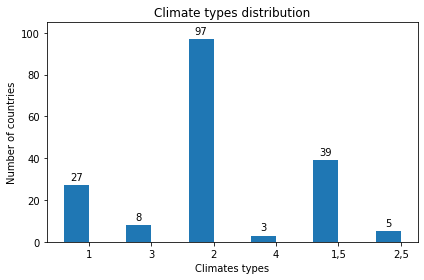

In [196]:
climate_types = countries['Climate'].unique()
values = climates.values

width = 0.4 # set the width of the bar
bar_locations = np.arange(len(values)) - width/2

fig, ax = plt.subplots() # create a figure and add a bar chart
bars = ax.bar(bar_locations, values, width)

ax.set_xlabel('Climates types')
ax.set_ylabel('Number of countries')
ax.set_title('Climate types distribution')
ax.set_xticks(np.array(np.arange(len(values))))
ax.set_xticklabels(climate_types)
ax.set_ylim(0, 105)

for bar in bars:
    h = bar.get_height()
    ax.annotate(h, xy=(bar.get_x() + bar.get_width()/2, h), xytext=(0, 3), 
                textcoords='offset points', ha='center', va='bottom')

fig.tight_layout()
plt.show()

From this bar chart it is very clear that most of the countries has **climate of type 2**